# Data pre-processing and exploration

## Set-up and data import

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="whitegrid")
import re
import text_to_x as ttx

In [2]:
data = pd.read_csv("data/china-user-tweets-2020-08-06.csv")

## User account filtering
Using the list provided at: https://docs.google.com/document/d/1q4XxcWuYIAu-DRc45zEbbE_Ybq5-jxRz/edit# 

In [3]:
# see unique accounts
user_list = data.from_user_name.unique()
user_list

array(['ChinaEUMission', 'zlj517', 'overseaschina', 'globaltimesnews',
       'koimagazinefr', 'CNS1952', 'huayunews', 'ChinaDaily', 'PDChinese',
       'AmbassadeChine', 'dw_chinese', 'ChinaBritain', 'ajplusfrancais',
       'SpokespersonCHN', 'ajcf_fr', 'euchinahub', 'ChinaEmbGermany',
       'AmbLiuXiaoMing', 'ChineseEmbinUK', 'BuonTAN', 'EUAmbChina',
       'ChinaBritTech'], dtype=object)

In [4]:
# remove accounts that are not marked in yellow in the google doc
non_yellow = ['koimagazinefr',
              'dw_chinese', 
              'ChinaBritain', 
              'ajplusfrancais', 
              'ajcf_fr', 
              'BuonTAN',
              'EUAmbChina',
              'ChinaBritTech'
             ]
clean_list = [user for user in user_list if user not in non_yellow]
clean_list

['ChinaEUMission',
 'zlj517',
 'overseaschina',
 'globaltimesnews',
 'CNS1952',
 'huayunews',
 'ChinaDaily',
 'PDChinese',
 'AmbassadeChine',
 'SpokespersonCHN',
 'euchinahub',
 'ChinaEmbGermany',
 'AmbLiuXiaoMing',
 'ChineseEmbinUK']

Yellow accounts present in goolge doc, but missing in the data:
['ouzhounews', 'HuXijin_GT', 'shen_shiwei', 'CGTNOfficial', 'XHNews', 'nhile_de', 'ChinoisEnFrance', 'overseaswenji', 'ZQX_wanghailong', 'ChinoisEurope', 'ectoday.eu', 'ambasciatacinese'] 


In [5]:
# filter data to only have users from clean_list
data = data[data['from_user_name'].isin(clean_list)]

## Getting to know the dataframe

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29663 entries, 0 to 31930
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           29663 non-null  int64  
 1   time                         29663 non-null  int64  
 2   created_at                   29663 non-null  object 
 3   from_user_name               29663 non-null  object 
 4   text                         29663 non-null  object 
 5   filter_level                 29663 non-null  object 
 6   possibly_sensitive           24199 non-null  float64
 7   withheld_copyright           0 non-null      float64
 8   withheld_scope               0 non-null      float64
 9   truncated                    0 non-null      float64
 10  retweet_count                29663 non-null  int64  
 11  favorite_count               29663 non-null  int64  
 12  lang                         29663 non-null  object 
 13  to_user_name    

In [7]:
# drop empty columns
data_clean = data.dropna(axis=1, how='all')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29663 entries, 0 to 31930
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           29663 non-null  int64  
 1   time                         29663 non-null  int64  
 2   created_at                   29663 non-null  object 
 3   from_user_name               29663 non-null  object 
 4   text                         29663 non-null  object 
 5   filter_level                 29663 non-null  object 
 6   possibly_sensitive           24199 non-null  float64
 7   retweet_count                29663 non-null  int64  
 8   favorite_count               29663 non-null  int64  
 9   lang                         29663 non-null  object 
 10  to_user_name                 1502 non-null   object 
 11  in_reply_to_status_id        1462 non-null   float64
 12  quoted_status_id             1713 non-null   float64
 13  source          

In [8]:
data_clean.head()

,id,time,created_at,from_user_name,text,filter_level,possibly_sensitive,retweet_count,favorite_count,lang,...,media_id,media_urls,media_type,media_indice_start,media_indice_end,photo_sizes_width,photo_sizes_height,photo_resize,mentions,hashtags
0,1262699470946516992,1589885988,2020-05-19 10:59:48,ChinaEUMission,All parties have reached consensus on a draft ...,low,0.0,0,0,en,...,1262697877803077632,https://pbs.twimg.com/media/EYYBB6EXkAAyrEA.jpg,photo,281,304,635,357,fit,WHO,NaN
1,1262705175489363968,1589887348,2020-05-19 11:22:28,ChinaEUMission,China's railway system is expected to reach 14...,low,0.0,0,0,en,...,1262704822089912321,https://pbs.twimg.com/media/EYYHWHjXkAEgjF_.jpg,photo,269,292,512,341,fit,NaN,NaN
2,1262747333747343366,1589897399,2020-05-19 14:09:59,ChinaEUMission,China has exported over 50 billion masks since...,low,0.0,0,0,en,...,1262747210246049794,https://pbs.twimg.com/media/EYYt5bvU0AI_Ivr.jpg,photo,250,273,2048,1366,fit,NaN,StrongerTogether
3,1262753525655719938,1589898875,2020-05-19 14:34:35,zlj517,RT @SpokespersonCHN: Not the first time to bas...,low,0.0,0,0,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SpokespersonCHN,NaN
4,1262753542101581830,1589898879,2020-05-19 14:34:39,zlj517,RT @SpokespersonCHN: That what does not kill y...,low,0.0,0,0,en,...,1262742771380543490,https://pbs.twimg.com/media/EYYp3DrUYAIolQR.jpg,photo,77,100,1080,595,fit,SpokespersonCHN,NaN


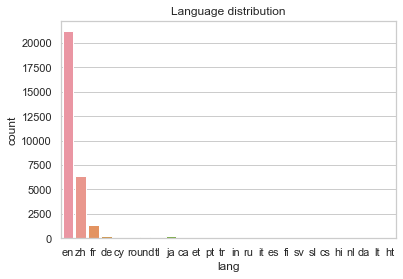

In [9]:
ax = sns.countplot(x="lang", data=data_clean).set_title('Language distribution')

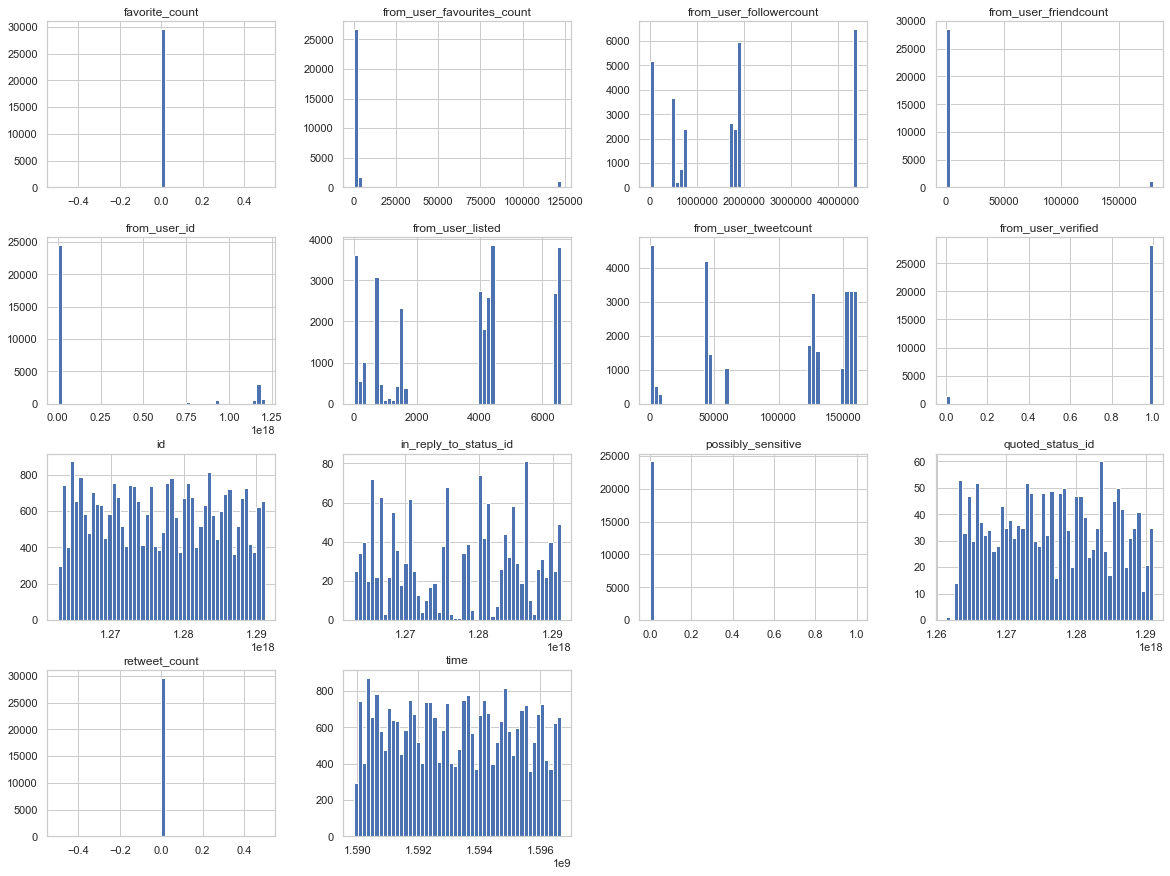

In [10]:
data_clean.hist(bins=50, figsize=(20,15))
plt.show()

## Text pre-processing

### Reproducing TextToX pipeline from earlier projects

In [11]:
"""
This script performs tokenization, extraction of lemmas, pos-tagging
and ner-tagging on Twitter data.
"""
import os
import time
import re
#import ndjson
import multiprocessing as mp
from functools import partial
import pandas as pd
#import text_to_x as ttx
from text_to_x.utils import detect_lang_polyglot, add_def_args
#stopword = stopwords.words(‘english’)

def chunks(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def to_ndjson(df):
    if df.empty:
        return []
    res = []
    for i, row in df.iterrows():
        lang = row['lang']
        d = {'created_at': row['created_at'],
             'user': row['from_user_name'],
             'verified': row['from_user_verified'],
             'id_str': str(row['id']),
             'text': row['text'],
             'retweet_count': row['retweet_count'],
             'favorite_count': row['favorite_count'],
             'lang': lang,
             'follower_count': row['from_user_followercount'],
             'hashtags_bytwitter': row['hashtags']
            }
        res.append(d)
    return res



def preprocess(lang, data):
    lang_posts = [d for d in data if d['lang'] == lang]
    # make placeholders to accumulate processing time
    time_text_extract = 0
    time_stanza = 0
    skipped_counter = 0
    chunk_n = 0
    # chunking - OUTER to avoid memory errors
    chunk_id = 0
    max_length = 20000
    chunked_posts = chunks(lang_posts, max_length)
    big_res = []
    for ch in chunked_posts:
        res = []
        ch = [post for post in ch]
        chunk_id += 1

        # chunking - INNER to handle stanza errors
        chunk_size = 500
        chunked_chunk = chunks(ch, chunk_size)
        for c in chunked_chunk:
            start = time.time()
            chunk_n += 1
            c = [post for post in c]
            texts = [post['text'] for post in c]

            time_text_extract_c = time.time() - start
            time_text_extract += time_text_extract_c

            # preprocess and tokenize using ttt object defined earlier
            start = time.time()
            ttt = ttx.TextToTokens(lang=lang,
                                   tokenize="stanza",
                                   lemmatize="stanza",
                                   pos="stanza",
                                   depparse="stanza",
                                   ner="stanza",
                                   silent=False)
            try:
                ttt.texts_to_tokens(texts)
            except:
                skipped_counter += 1
                continue
            ttt.twitter_format()
            dfs = ttt.get_token_dfs()
            for i, post in enumerate(c):
                post['tokens'] = dfs[i].to_dict()
            res += c
            time_stanza_c = time.time() - start
            time_stanza += time_stanza_c
        
        big_res += res
    return big_res
    
    
    
    #no_url = " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
    # lower = no_url.lower()
    # word_tokens = nltk.word_tokenize(lower)
    # no_stop = [word for word in word_tokens if word not in stopword]
    #dfs = ttt.texts_to_tokens(no_url)
    #ttt.twitter_format()
    #dfs = ttt.get_token_dfs()
    #return 

def clean_tweet(row):
    text = row['text']
    text = text.lower()
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    return text

### English pre-processing

In [12]:
df = to_ndjson(data_clean)
english_data = preprocess('en', df)

2020-08-21 12:35:24 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-21 12:35:24 INFO: Use device: cpu
2020-08-21 12:35:24 INFO: Loading: tokenize
2020-08-21 12:35:24 INFO: Loading: pos
2020-08-21 12:35:25 INFO: Loading: lemma
2020-08-21 12:35:25 INFO: Loading: depparse
2020-08-21 12:35:26 INFO: Loading: ner
2020-08-21 12:35:27 INFO: Done loading processors!
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/text_to_x/TextToTokens.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ner'][at_idx] = "TWITTER_USER"
/Users/anitakurm/anaconda3/envs/text_to_x/lib/python3.6/site-packages/pan

2020-08-21 13:37:52 INFO: Use device: cpu
2020-08-21 13:37:52 INFO: Loading: tokenize
2020-08-21 13:37:52 INFO: Loading: pos
2020-08-21 13:37:54 INFO: Loading: lemma
2020-08-21 13:37:54 INFO: Loading: depparse
2020-08-21 13:37:56 INFO: Loading: ner
2020-08-21 13:37:57 INFO: Done loading processors!
2020-08-21 13:42:13 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-21 13:42:13 INFO: Use device: cpu
2020-08-21 13:42:13 INFO: Loading: tokenize
2020-08-21 13:42:13 INFO: Loading: pos
2020-08-21 13:42:14 INFO: Loading: lemma
2020-08-21 13:42:14 INFO: Loading: depparse
2020-08-21 13:42:16 INFO: Loading: ner
2020-08-21 13:42:17 INFO: Done loading processors!
2020-08-21 13:48:34 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

2020-08-21 15:13:03 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-21 15:13:03 INFO: Use device: cpu
2020-08-21 15:13:03 INFO: Loading: tokenize
2020-08-21 15:13:03 INFO: Loading: pos
2020-08-21 15:13:04 INFO: Loading: lemma
2020-08-21 15:13:04 INFO: Loading: depparse
2020-08-21 15:13:06 INFO: Loading: ner
2020-08-21 15:13:06 INFO: Done loading processors!
2020-08-21 15:17:47 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-21 15:17:47 INFO: Use device: cpu
2020-08-21 15:17:47 INFO: Loading: tokenize
2020-08-21 15:17:47 INFO: Loading: pos
2020-08-21 15:17:49 INFO: Loading: lemma
2020-08-21 15:17:4

2020-08-21 16:19:11 INFO: Use device: cpu
2020-08-21 16:19:11 INFO: Loading: tokenize
2020-08-21 16:19:11 INFO: Loading: pos
2020-08-21 16:19:13 INFO: Loading: lemma
2020-08-21 16:19:13 INFO: Loading: depparse
2020-08-21 16:19:14 INFO: Loading: ner
2020-08-21 16:19:15 INFO: Done loading processors!
2020-08-21 16:23:31 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | ewt       |
| pos       | ewt       |
| lemma     | ewt       |
| depparse  | ewt       |
| ner       | ontonotes |

2020-08-21 16:23:31 INFO: Use device: cpu
2020-08-21 16:23:31 INFO: Loading: tokenize
2020-08-21 16:23:31 INFO: Loading: pos
2020-08-21 16:23:32 INFO: Loading: lemma
2020-08-21 16:23:32 INFO: Loading: depparse
2020-08-21 16:23:33 INFO: Loading: ner
2020-08-21 16:23:34 INFO: Done loading processors!
2020-08-21 16:27:50 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | e

In [13]:
en_df = pd.DataFrame(english_data)
en_df['text_clean'] = en_df.apply(clean_tweet, axis = 1)
en_df.head()

,created_at,user,verified,id_str,text,retweet_count,favorite_count,lang,follower_count,hashtags_bytwitter,tokens,text_clean
0,2020-05-19 10:59:48,ChinaEUMission,1,1262699470946516992,All parties have reached consensus on a draft ...,0,0,en,14658,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",all parties have reached consensus on a draft ...
1,2020-05-19 11:22:28,ChinaEUMission,1,1262705175489363968,China's railway system is expected to reach 14...,0,0,en,14659,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china s railway system is expected to reach 14...
2,2020-05-19 14:09:59,ChinaEUMission,1,1262747333747343366,China has exported over 50 billion masks since...,0,0,en,14665,StrongerTogether,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china has exported over 50 billion masks since...
3,2020-05-19 14:34:35,zlj517,1,1262753525655719938,RT @SpokespersonCHN: Not the first time to bas...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn not the first time to bas...
4,2020-05-19 14:34:39,zlj517,1,1262753542101581830,RT @SpokespersonCHN: That what does not kill y...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn that what does not kill y...


In [19]:
en_df_n = en_df.set_index('id_str')
token_df = en_df_n.tokens.apply(pd.Series)
en_df_n = pd.concat([en_df_n, token_df], axis=1)


def lemmas_to_list(row):
     return ' '.join(list(row['lemma'].values()))
                 
en_df_n['text_lemmatized'] = en_df_n.apply(lemmas_to_list, axis = 1)
en_df_n.head()

,created_at,user,verified,text,retweet_count,favorite_count,lang,follower_count,hashtags_bytwitter,tokens,text_clean,text_lemmatized,n_sent,token,lemma,upos,xpos,dependency relation,ner
id_str,,,,,,,,,,,,,,,,,,,
1262699470946516992,2020-05-19 10:59:48,ChinaEUMission,1,All parties have reached consensus on a draft ...,0,0,en,14658,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",all parties have reached consensus on a draft ...,all party have reach consensus on a draft reso...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'All', 1: 'parties', 2: 'have', 3: 'reache...","{0: 'all', 1: 'party', 2: 'have', 3: 'reach', ...","{0: 'DET', 1: 'NOUN', 2: 'AUX', 3: 'VERB', 4: ...","{0: 'DT', 1: 'NNS', 2: 'VBP', 3: 'VBN', 4: 'NN...","{0: 'det', 1: 'nsubj', 2: 'aux', 3: 'root', 4:...","{0: None, 1: None, 2: None, 3: None, 4: None, ..."
1262705175489363968,2020-05-19 11:22:28,ChinaEUMission,1,China's railway system is expected to reach 14...,0,0,en,14659,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china s railway system is expected to reach 14...,China 's railway system be expect to reach 146...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'China', 1: ''s', 2: 'railway', 3: 'system...","{0: 'China', 1: ''s', 2: 'railway', 3: 'system...","{0: 'PROPN', 1: 'PART', 2: 'NOUN', 3: 'NOUN', ...","{0: 'NNP', 1: 'POS', 2: 'NN', 3: 'NN', 4: 'VBZ...","{0: 'nmod:poss', 1: 'case', 2: 'compound', 3: ...","{0: 'GPE', 1: None, 2: None, 3: None, 4: None,..."
1262747333747343366,2020-05-19 14:09:59,ChinaEUMission,1,China has exported over 50 billion masks since...,0,0,en,14665,StrongerTogether,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",china has exported over 50 billion masks since...,China have export over 50 billion mask since M...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'China', 1: 'has', 2: 'exported', 3: 'over...","{0: 'China', 1: 'have', 2: 'export', 3: 'over'...","{0: 'PROPN', 1: 'AUX', 2: 'VERB', 3: 'ADV', 4:...","{0: 'NNP', 1: 'VBZ', 2: 'VBN', 3: 'RB', 4: 'CD...","{0: 'nsubj', 1: 'aux', 2: 'root', 3: 'advmod',...","{0: 'GPE', 1: None, 2: None, 3: None, 4: 'CARD..."
1262753525655719938,2020-05-19 14:34:35,zlj517,1,RT @SpokespersonCHN: Not the first time to bas...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn not the first time to bas...,rt @spokespersonchn : not the first time to ba...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'RT', 1: '@SpokespersonCHN', 2: ':', 3: 'N...","{0: 'rt', 1: '@spokespersonchn', 2: ':', 3: 'n...","{0: 'NOUN', 1: 'NOUN', 2: 'PUNCT', 3: 'PART', ...","{0: 'NN', 1: 'NN', 2: ':', 3: 'RB', 4: 'DT', 5...","{0: 'compound', 1: 'root', 2: 'punct', 3: 'adv...","{0: None, 1: 'TWITTER_USER', 2: None, 3: None,..."
1262753542101581830,2020-05-19 14:34:39,zlj517,1,RT @SpokespersonCHN: That what does not kill y...,0,0,en,621491,NaN,"{'n_sent': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0...",rt spokespersonchn that what does not kill y...,rt @spokespersonchn : that what do not kill yo...,"{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: ...","{0: 'RT', 1: '@SpokespersonCHN', 2: ':', 3: 'T...","{0: 'rt', 1: '@spokespersonchn', 2: ':', 3: 't...","{0: 'NOUN', 1: 'NOUN', 2: 'PUNCT', 3: 'SCONJ',...","{0: 'NN', 1: 'NN', 2: ':', 3: 'IN', 4: 'WP', 5...","{0: 'compound', 1: 'root', 2: 'punct', 3: 'mar...","{0: None, 1: 'TWITTER_USER', 2: None, 3: None,..."


In [20]:
# save processed df
# en_df.to_csv('data/english_preprocessed.csv')
en_df_n.to_csv('data/english_preprocessed_with_lemmas.csv')


### Chinese pre-processing

In [ ]:
chinese_data = preprocess('zh', df)

In [ ]:
zh_df = pd.DataFrame(chinese_data)
zh_df.head()

In [ ]:
zh_df.to_csv('data/chinese_preprocessed.csv')

### French pre-processing

In [ ]:
french_data = preprocess('fr', df)

In [ ]:
french_data

In [ ]:
fr_df = pd.DataFrame(french_data)
fr_df.head()

In [ ]:
fr_df.to_csv('data/french_preprocessed.csv') #empty?